In [1]:
import os,sys

import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras.utils
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

Using TensorFlow backend.


### IMPORTANT

Change the `nrows` below to train on full dataset.

In [2]:
df = pd.read_csv("../data/exT.csv",low_memory=False, nrows=5000)
print(df.shape)
df.head()

(5000, 19103)


Unnamed: 0      RAB4B     TIGAR     RNF44      DNAH3      RPL23A  \
0     Liver.1   2.367912  0.698684  3.931116   0.000000  116.288461   
1    Kidney.1  26.299800  2.498500  0.255600  14.944300    2.049600   
2  Prostate.1   5.592506  2.953563  7.065690   0.012499  325.521932   
3    Kidney.2  21.554200  1.334700  1.095300  23.476800    8.741300   
4    Kidney.3  22.820100  2.640900  3.750800  29.774900    7.595200   

       ARL8B     CALB2      MFSD3      PIGV  ...   SLCO4C1  ARHGAP21  \
0  13.839265  0.021383  14.722173  5.437620  ...  0.000000  1.199607   
1   3.262300  0.146400  14.132900  3.323600  ...  0.000000  0.000000   
2  22.144552  0.356845  28.899361  6.717593  ...  0.030674  2.062158   
3  11.491700  0.945500  32.975700  6.187900  ...  0.000000  0.000000   
4  15.186900  0.482000  19.233800  8.741800  ...  0.000000  0.000000   

      DDX47    POMZP3       SDS     TENM1     CYP4F2    PPP6R1     BATF3  \
0  0.101155  1.428458  2.471339  0.042357  44.610061  6.394772  0.281878   
1  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
2  0.185503  8.414909  2.690346  0.688731   0.260365  9.792451  1.671371   
3  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   

   OR8D4  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0  

[5 rows x 19103 columns]

In [3]:
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 19103 entries, Unnamed: 0 to OR8D4
dtypes: float64(19099), int64(3), object(1)
memory usage: 728.7+ MB


In [4]:
df = df.rename(columns={'Unnamed: 0':'labels'})
df.head()

labels      RAB4B     TIGAR     RNF44      DNAH3      RPL23A  \
0     Liver.1   2.367912  0.698684  3.931116   0.000000  116.288461   
1    Kidney.1  26.299800  2.498500  0.255600  14.944300    2.049600   
2  Prostate.1   5.592506  2.953563  7.065690   0.012499  325.521932   
3    Kidney.2  21.554200  1.334700  1.095300  23.476800    8.741300   
4    Kidney.3  22.820100  2.640900  3.750800  29.774900    7.595200   

       ARL8B     CALB2      MFSD3      PIGV  ...   SLCO4C1  ARHGAP21  \
0  13.839265  0.021383  14.722173  5.437620  ...  0.000000  1.199607   
1   3.262300  0.146400  14.132900  3.323600  ...  0.000000  0.000000   
2  22.144552  0.356845  28.899361  6.717593  ...  0.030674  2.062158   
3  11.491700  0.945500  32.975700  6.187900  ...  0.000000  0.000000   
4  15.186900  0.482000  19.233800  8.741800  ...  0.000000  0.000000   

      DDX47    POMZP3       SDS     TENM1     CYP4F2    PPP6R1     BATF3  \
0  0.101155  1.428458  2.471339  0.042357  44.610061  6.394772  0.281878   
1  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
2  0.185503  8.414909  2.690346  0.688731   0.260365  9.792451  1.671371   
3  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   

   OR8D4  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0  

[5 rows x 19103 columns]

In [5]:
# df.describe() # not so helpful because of 19k features

In [6]:
df.isna().sum().sum()/ len(df) * 100 # check for NaNs, If any..

0.0

In [7]:
df['Y'] = df['labels'].apply(lambda x: x.split(".")[0])
df['Y'].head()

0       Liver
1      Kidney
2    Prostate
3      Kidney
4      Kidney
Name: Y, dtype: object

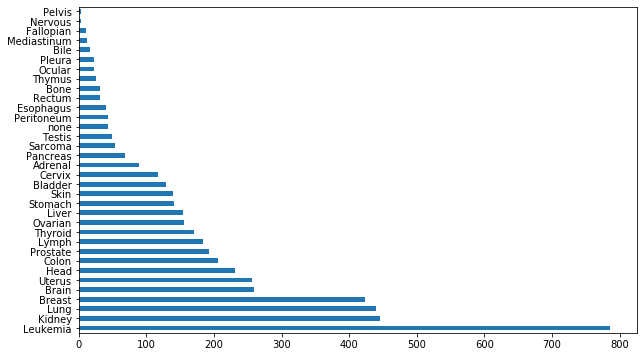

In [8]:
df['Y'].value_counts().plot(kind='barh', figsize = (10,6))

Looks like the dataset is extremely imbalanced. Might have to do do something for it. 

I tried to visualize these values as well.
Figure below shows the boxplots for two of these features.

(0, 250)

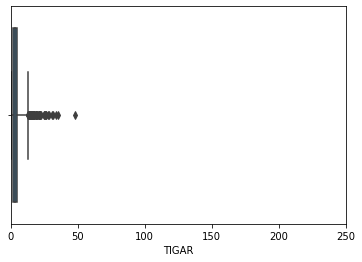

In [9]:
import seaborn as sns
sns.boxplot(df['TIGAR'], whis= 3)
plt.xlim(0, 250)

(0, 250)

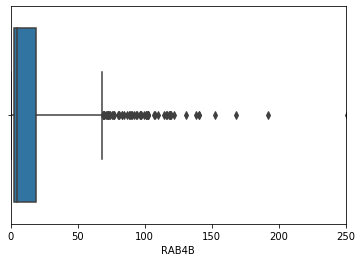

In [10]:
import seaborn as sns
sns.boxplot(df['RAB4B'], whis= 3)
plt.xlim(0, 250)

There are some outliers, but not sure we need to remove them for classifier to improve its robustness or use just as it is since this is Gene's data. 
Also since we are more concerned on the determination of classification, I'd say we can get away with this since it performed satisfactorily.

### Label Encoding the categorical variable Y

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()

df['Y'] = label_encoder.fit_transform(df['Y'])
df['Y'].head()

0    13
1    11
2    24
3    11
4    11
Name: Y, dtype: int64

In [12]:
print(len(label_encoder.classes_))
label_encoder.classes_

34


array(['Adrenal', 'Bile', 'Bladder', 'Bone', 'Brain', 'Breast', 'Cervix',
       'Colon', 'Esophagus', 'Fallopian', 'Head', 'Kidney', 'Leukemia',
       'Liver', 'Lung', 'Lymph', 'Mediastinum', 'Nervous', 'Ocular',
       'Ovarian', 'Pancreas', 'Pelvis', 'Peritoneum', 'Pleura',
       'Prostate', 'Rectum', 'Sarcoma', 'Skin', 'Stomach', 'Testis',
       'Thymus', 'Thyroid', 'Uterus', 'none'], dtype=object)

In [13]:
labels = df.pop("labels")
Y = df.pop("Y")

In [14]:
Y.head()

0    13
1    11
2    24
3    11
4    11
Name: Y, dtype: int64

### Converting Y into 1-hot

In [15]:
Y = keras.utils.to_categorical(Y)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
df.head() # X

RAB4B     TIGAR     RNF44      DNAH3      RPL23A      ARL8B     CALB2  \
0   2.367912  0.698684  3.931116   0.000000  116.288461  13.839265  0.021383   
1  26.299800  2.498500  0.255600  14.944300    2.049600   3.262300  0.146400   
2   5.592506  2.953563  7.065690   0.012499  325.521932  22.144552  0.356845   
3  21.554200  1.334700  1.095300  23.476800    8.741300  11.491700  0.945500   
4  22.820100  2.640900  3.750800  29.774900    7.595200  15.186900  0.482000   

       MFSD3      PIGV     ZNF708  ...   SLCO4C1  ARHGAP21     DDX47  \
0  14.722173  5.437620   0.124913  ...  0.000000  1.199607  0.101155   
1  14.132900  3.323600   0.014800  ...  0.000000  0.000000  0.000000   
2  28.899361  6.717593   1.759132  ...  0.030674  2.062158  0.185503   
3  32.975700  6.187900  42.428300  ...  0.000000  0.000000  0.000000   
4  19.233800  8.741800   1.025000  ...  0.000000  0.000000  0.000000   

     POMZP3       SDS     TENM1     CYP4F2    PPP6R1     BATF3  OR8D4  
0  1.428458  2.471339  0.042357  44.610061  6.394772  0.281878    0.0  
1  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000    0.0  
2  8.414909  2.690346  0.688731   0.260365  9.792451  1.671371    0.0  
3  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000    0.0  
4  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000    0.0  

[5 rows x 19102 columns]

### Train-Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 19102), (1000, 19102), (4000, 34), (1000, 34))

Faced MemoryError while standardizing this so doing these steps  
- reset df variable from memory
- save backup for splitted data

In [18]:
# Variables in memory that's hogging the memories greater than 1MB.
local_vars = list(locals().items())
for var, obj in local_vars:
    size = sys.getsizeof(obj)/1000
    if size > 1024:
        print(var, size/1024,"MB")

# df 2439707.544 KB # Evenif the memory was just 2.4GB, it was giving issues occassionally.
# labels 1075.379 KB
# X_train 1951868.152 KB
# X_test 487967.056 KB
# y_train 1737.104 KB


df 2382.5268984375 MB
labels 1.0501748046875 MB
X_train 1906.1212421875 MB
X_test 476.530328125 MB
y_train 1.696390625 MB


In [19]:
# %reset_selective -f "^df$"  # Releasing memory of df variable

### Feature Scaling 

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 
X_test.shape

(1000, 19102)

In [19]:
filename = "../data/load/5k_lime/7scaled_splitted_data_lime.npz"
# filename = "../data/splitted_data_X_train.npz"

In [20]:
np.savez_compressed(filename, X_train=X_train, X_test=X_test, 
                    y_train=y_train, y_test=y_test,
                    feature_names=df.columns,
                    class_names=label_encoder.classes_
                   )
print(f"{filename} data saved..")

../data/load/5k_lime/7scaled_splitted_data_lime.npz data saved..


Load the splitted variables for next step.
Just Run this below to load them and start experimentation later.

In [21]:
# a = np.load(filename)

In [22]:
# X_train, X_test, y_train, y_test = a["X_train"], a["X_test"], a["y_train"], a["y_test"]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 19102), (1000, 19102), (4000, 34), (1000, 34))

### Model Definition

In [23]:
model = Sequential()
model.add(Dense(1024, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(512, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(y_train.shape[1], activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['categorical_crossentropy','accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              19561472  
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 34)                4386      
Total params: 20,156,322
Trainable params: 20,156,322
Non-trainable params: 0
_________________________________________________________________


## Training

In [25]:
checkpoint_path = "out/5k_lime/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [26]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    verbose=1, 
                    epochs=5, 
                    shuffle=True,
                    callbacks = [cp_callback])

Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 4s 1ms/step - loss: 1.4725 - categorical_crossentropy: 1.4725 - accuracy: 0.7732 - val_loss: 0.6619 - val_categorical_crossentropy: 0.6619 - val_accuracy: 0.8700

Epoch 00001: saving model to out/5k_lime/cp.ckpt
Epoch 2/5
4000/4000 [==============================] - 4s 974us/step - loss: 0.4251 - categorical_crossentropy: 0.4251 - accuracy: 0.9032 - val_loss: 0.5968 - val_categorical_crossentropy: 0.5968 - val_accuracy: 0.8940

Epoch 00002: saving model to out/5k_lime/cp.ckpt
Epoch 3/5
4000/4000 [==============================] - 4s 974us/step - loss: 0.2985 - categorical_crossentropy: 0.2985 - accuracy: 0.9325 - val_loss: 0.7274 - val_categorical_crossentropy: 0.7274 - val_accuracy: 0.8870

Epoch 00003: saving model to out/5k_lime/cp.ckpt
Epoch 4/5
4000/4000 [==============================] - 4s 985us/step - loss: 0.2625 - categorical_crossentropy: 0.2625 - accuracy: 0.9375 - val_los

## Evaluating with Validation set

In [27]:
predicted_valid_labels = np.argmax(model.predict(X_test), axis=1)
valid_labels = np.argmax(y_test, axis=1)

test_range = range(10)
print("Predicted labels: ", predicted_valid_labels[test_range])
print("True labels: ", valid_labels[test_range])

real = label_encoder.inverse_transform(valid_labels[test_range])
predicts = label_encoder.inverse_transform(predicted_valid_labels[test_range])
print("real:preds\n",{real[i]:predicts[i] for i in test_range})

Predicted labels:  [ 7  5 15 27  0 15 32 11 11  7]
True labels:  [ 7  5 15 27  0 15 32 11 11  7]
real:preds
 {'Colon': 'Colon', 'Breast': 'Breast', 'Lymph': 'Lymph', 'Skin': 'Skin', 'Adrenal': 'Adrenal', 'Uterus': 'Uterus', 'Kidney': 'Kidney'}


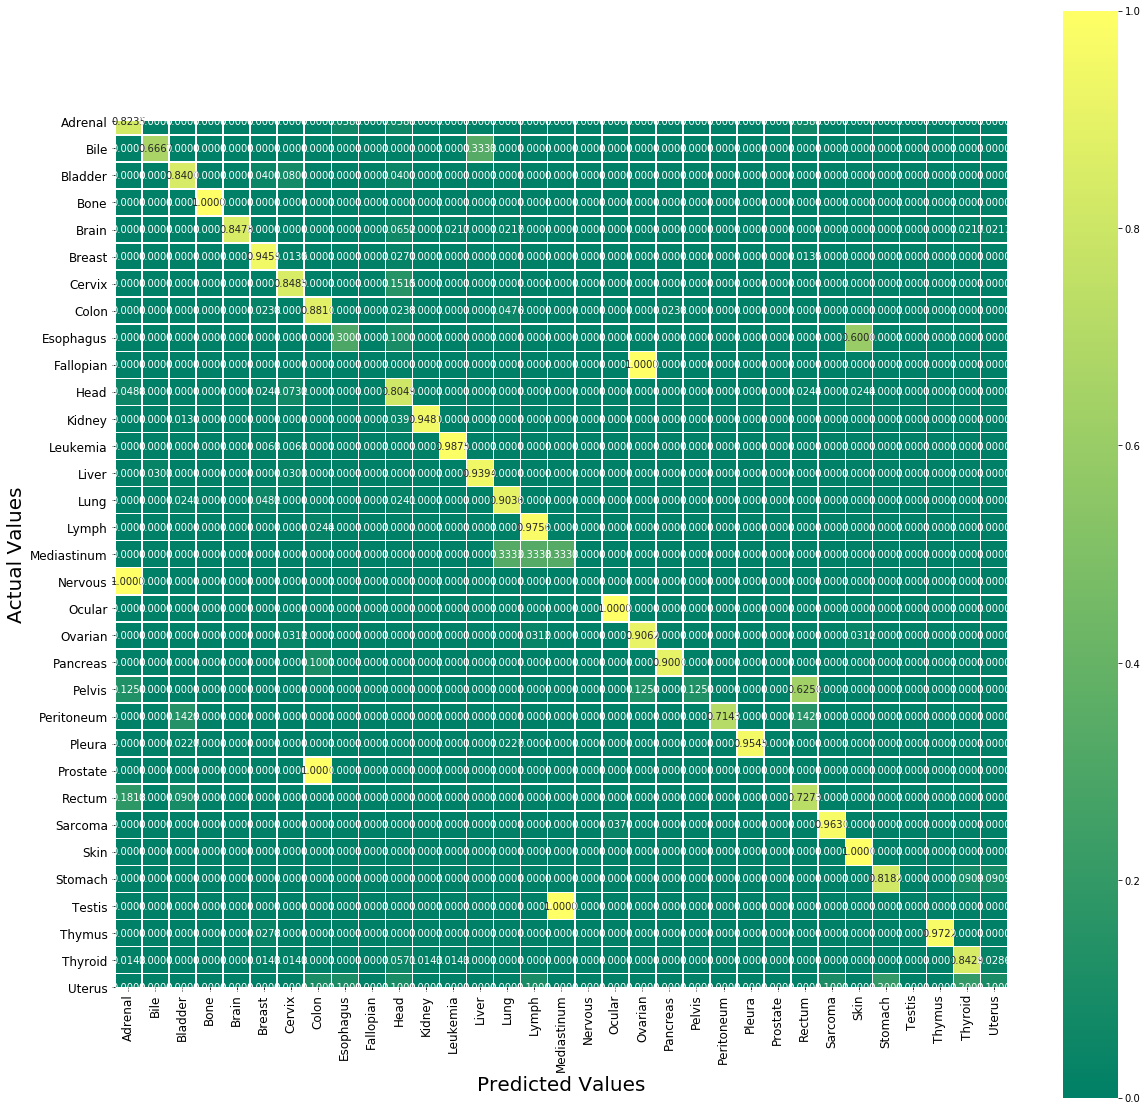

In [28]:
# Visualization of Confusion Matrix
import seaborn as sns

cm = metrics.confusion_matrix(valid_labels, predicted_valid_labels)
# print(cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(20,20))
sns.heatmap(cm_normalized, annot=True, fmt=".4f", linewidths=.5, square = True, cmap = 'summer')
plt.xlabel('Predicted Values', size=20)
plt.ylabel('Actual Values', size=20)

ticks = np.arange(len(set(valid_labels)))
tick_marks = ['Adrenal', 'Bile', 'Bladder', 'Bone', 'Brain', 'Breast', 'Cervix',
       'Colon', 'Esophagus', 'Fallopian', 'Head', 'Kidney', 'Leukemia',
       'Liver', 'Lung', 'Lymph', 'Mediastinum', 'Nervous', 'Ocular',
       'Ovarian', 'Pancreas', 'Pelvis', 'Peritoneum', 'Pleura',
       'Prostate', 'Rectum', 'Sarcoma', 'Skin', 'Stomach', 'Testis',
       'Thymus', 'Thyroid', 'Uterus', 'none']

plt.xticks(ticks+0.5 ,tick_marks, rotation=90, size=12) #add 0.5 to ticks to position it at center
plt.yticks(ticks+0.5 ,tick_marks, rotation=0, size=12)
# all_sample_title = 'Accuracy Score: {:.4f}'.format(93) # hardcoded this from training logs for now :D
# plt.title(all_sample_title, size = 30)
plt.show()

## Lime Explainer

In [29]:
import lime
import lime.lime_tabular

we compute statistics on each feature (column). If the feature is numerical, we compute the mean and std, and discretize it into quartiles

In [30]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, 
                                                   feature_names=df.columns, 
                                                   class_names=label_encoder.classes_, 
                                                   discretize_continuous=True)

For this multi-class classification problem, we set the top_labels parameter, so that we only explain the top class with the highest level of probability.

In [36]:
i = np.random.randint(0, X_test.shape[0])
print(i)
exp = explainer.explain_instance(X_test[i], model.predict_proba, num_features=2, top_labels=1)

412


In [37]:
exp.show_in_notebook(show_table=True, show_all=False)

In [38]:
exp.show_in_notebook(show_table=True, show_all=True)